Chapter 8
# 用色谱给一组曲线着色
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导数包
from matplotlib.collections import LineCollection
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
# 导入色谱
from scipy.stats import norm
# 导入正态分布
# 参考
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 1. 用for循环

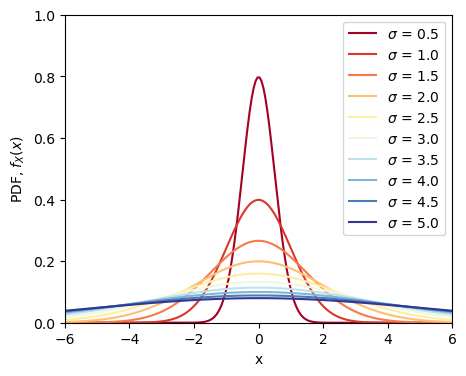

In [2]:
x_array = np.linspace(-6, 6, 200)
sigma_array = np.linspace(0.5,5,10)
# 设定标准差一系列取值

num_lines = len(sigma_array)
# 概率密度曲线条数

colors = cm.RdYlBu(np.linspace(0,1,num_lines))
# 选定色谱，并产生一系列色号

fig, ax = plt.subplots(figsize = (5,4))

for idx, sigma_idx in enumerate(sigma_array):
    
    pdf_idx = norm.pdf(x_array, scale = sigma_idx)
    legend_idx = '$\sigma$ = ' + str(sigma_idx)
    plt.plot(x_array, pdf_idx, color=colors[idx], label = legend_idx)
    # 依次绘制概率密度曲线

plt.legend()
# 增加图例

plt.xlim(x_array.min(),x_array.max())
plt.ylim(0,1)
plt.xlabel('x')
plt.ylabel('PDF, $f_X(x)$')

fig.savefig('Figures/用for循环.svg', format='svg')


### 2. 用LineCollection

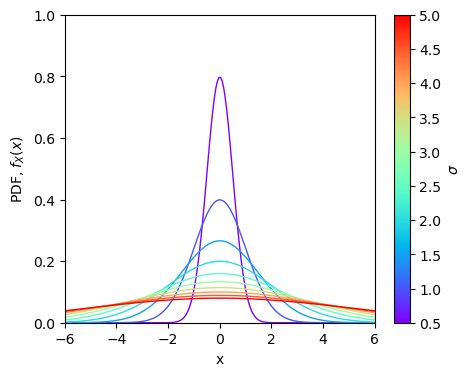

In [3]:
PDF_curves = [np.column_stack([x_array, norm.pdf(x_array, scale = sigma_idx)]) for sigma_idx in sigma_array]

fig, ax = plt.subplots(figsize = (5,4))

lc = LineCollection(PDF_curves, cmap='rainbow',array=sigma_array,linewidth=1)
# LineCollection 可以看成是一系列线段的集合
# 可以用色谱分别渲染每一条线段
# 这样可以得到颜色连续变化的效果
line = ax.add_collection(lc) #add to the subplot
fig.colorbar(line, label='$\sigma$')
# 添加色谱条

plt.xlim(x_array.min(),x_array.max())
plt.ylim(0,1)
plt.xlabel('x')
plt.ylabel('PDF, $f_X(x)$')
fig.savefig('Figures/用LineCollection.svg', format='svg')

### 3. 用set_prop_cycle()

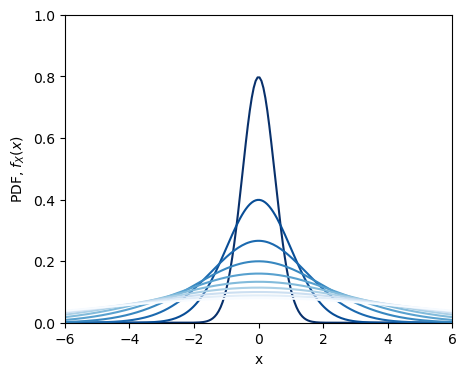

In [4]:
cmap = plt.get_cmap('Blues_r')
colors = cmap(np.linspace(0,1,num_lines))

x = np.linspace(0,2*np.pi)
ys = np.ones((10,50)) * np.sin(x)
ys = np.array([ys[i,] * np.linspace(1,0.1,10)[i] for i in range(10)])

fig, ax = plt.subplots(figsize = (5,4))
ax.set_prop_cycle(color=colors) 
# 设定线图颜色

plt.plot(x_array, np.array([norm.pdf(x_array, scale = sigma_idx) for sigma_idx in sigma_array]).T)

plt.xlim(x_array.min(),x_array.max())
plt.ylim(0,1)
plt.xlabel('x')
plt.ylabel('PDF, $f_X(x)$')
fig.savefig('Figures/用set_prop_cycle().svg', format='svg')

In [5]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023